In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
yelp = pd.read_csv("/content/gdrive/My Drive/yelp.csv", sep = ",", index_col = False)

In [0]:
def xsplit(data):
  return np.asarray(data.drop(["photo_id", "label"], axis = 1))
def ysplit(data):
  return np.asarray(pd.get_dummies(data["label"]))

In [0]:
## train test full dataset
train, test = train_test_split(yelp, test_size = 0.2, random_state = 7006)
train, valid = train_test_split(train, test_size = 0.4, random_state = 6288)
x_train = xsplit(train)
y_train = ysplit(train)
x_test = xsplit(test)
y_test = ysplit(test)
x_valid = xsplit(valid)
y_valid = ysplit(valid)
del train
del valid
del test

In [0]:
dim = x_train.shape[1]
num_classes = 5

In [8]:
from keras.layers import Input, Dense, Dropout, Embedding, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from keras.applications import VGG16, VGG19, ResNet50, InceptionV3, InceptionResNetV2, MobileNet, MobileNetV2
from keras.models import Sequential
import keras
import cv2

Using TensorFlow backend.


In [9]:
## MLP 87.8%
model = Sequential()
model.add(Dense(512, activation = "relu", input_shape = (100,)))
model.add(Dropout(0.7))
model.add(Dense(num_classes, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adadelta", metrics = ["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               51712     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2565      
Total params: 54,277
Trainable params: 54,277
Non-trainable params: 0
_________________________________________________________________


In [10]:
train_model = model.fit(x_train, y_train, epochs = 200, batch_size = 2048, verbose = 1, validation_data = (x_valid, y_valid))

Train on 134875 samples, validate on 89918 samples
Epoch 1/200
134875/134875 [==============================] - 3s 23us/step - loss: 0.7719 - acc: 0.7416 - val_loss: 0.4987 - val_acc: 0.8271
Epoch 2/200
134875/134875 [==============================] - 1s 7us/step - loss: 0.5457 - acc: 0.8144 - val_loss: 0.4551 - val_acc: 0.8384
Epoch 3/200
134875/134875 [==============================] - 1s 8us/step - loss: 0.5039 - acc: 0.8233 - val_loss: 0.4385 - val_acc: 0.8428
Epoch 4/200
134875/134875 [==============================] - 1s 8us/step - loss: 0.4800 - acc: 0.8315 - val_loss: 0.4264 - val_acc: 0.8456
Epoch 5/200
134875/134875 [==============================] - 1s 9us/step - loss: 0.4631 - acc: 0.8358 - val_loss: 0.4193 - val_acc: 0.8475
Epoch 6/200
134875/134875 [==============================] - 1s 8us/step - loss: 0.4527 - acc: 0.8394 - val_loss: 0.4125 - val_acc: 0.8511
Epoch 7/200
134875/134875 [==============================] - 1s 8us/step - loss: 0.4405 - acc: 0.8429 - val_loss: 

In [0]:
## test score
test_score = model.evaluate(x_test, y_test, verbose = 0)
print("Test loss:", test_score[0])
print("Test accuracy:", test_score[1])
pred_test = model.predict(x_test)

Test loss: 0.36554656698076143
Test accuracy: 0.8747664549201872


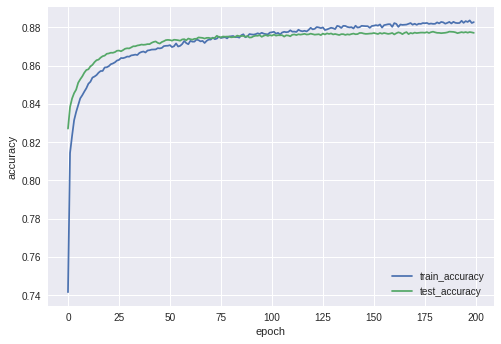

In [11]:
import matplotlib.pyplot as plt
def show_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

show_history(train_model)

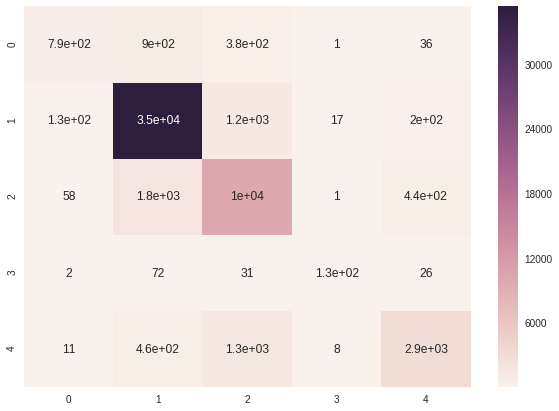

In [0]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def print_cmx(y_true, y_pred):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    plt.figure(figsize = (10,7))
    sn.heatmap(df_cmx, annot=True)
    plt.show()

from sklearn.metrics import classification_report, accuracy_score
a = np.argmax(y_test, axis = 1)
b = np.argmax(pred_test, axis = 1)
print_cmx(a, b)

In [0]:
## KNN+CNN 85.93%
pred_train = model.predict(x_valid)
pred_test = model.predict(x_test)
from sklearn.neighbors import KNeighborsClassifier
# make models
knn_128 = KNeighborsClassifier(n_neighbors=128)

knn_128.fit(pred_train, y_valid)

kn_128_pr = knn_128.predict(pred_test)

from sklearn.metrics import accuracy_score

val = str(pow(2, 7))
eval("print(\"k=" + val + ":{}\".format(accuracy_score(kn_" + val + "_pr, y_test)))")

k=128:0.8593213402373707


In [0]:
x_train = x_train.reshape(-1,100,1)
x_valid = x_valid.reshape(-1,100,1)
x_test = x_test.reshape(-1,100,1)

In [13]:
## CNN 87.17%
model2 = Sequential()
model2.add(Conv1D(128, 3, activation = "relu", use_bias = False, padding = "same", input_shape = (100,1)))
model2.add(BatchNormalization())
model2.add(MaxPooling1D(2))
model2.add(Conv1D(256, 3, activation = "relu", use_bias = False, padding = "same"))
model2.add(BatchNormalization())
model2.add(MaxPooling1D(2))
model2.add(Flatten())
model2.add(Dense(1024, activation = "relu"))
model2.add(Dropout(0.6))
model2.add(Dense(num_classes, activation = "softmax"))
model2.compile(loss = "categorical_crossentropy", optimizer = "adadelta", metrics = ["acc"])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 100, 128)          384       
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 128)          512       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 256)           98304     
_________________________________________________________________
batch_normalization_2 (Batch (None, 50, 256)           1024      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 25, 256)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
__________

In [14]:
train_model2 = model2.fit(x_train, y_train, epochs = 50, batch_size = 2048, verbose = 1, validation_data = (x_valid, y_valid))

Train on 134875 samples, validate on 89918 samples
Epoch 1/50
134875/134875 [==============================] - 19s 144us/step - loss: 1.2908 - acc: 0.7559 - val_loss: 0.4708 - val_acc: 0.8308
Epoch 2/50
134875/134875 [==============================] - 16s 118us/step - loss: 0.4817 - acc: 0.8287 - val_loss: 0.4405 - val_acc: 0.8434
Epoch 3/50
134875/134875 [==============================] - 16s 119us/step - loss: 0.4218 - acc: 0.8472 - val_loss: 0.4445 - val_acc: 0.8394
Epoch 4/50
134875/134875 [==============================] - 16s 119us/step - loss: 0.3893 - acc: 0.8584 - val_loss: 0.4090 - val_acc: 0.8558
Epoch 5/50
134875/134875 [==============================] - 16s 119us/step - loss: 0.3582 - acc: 0.8693 - val_loss: 0.3794 - val_acc: 0.8634
Epoch 6/50
134875/134875 [==============================] - 16s 119us/step - loss: 0.3253 - acc: 0.8804 - val_loss: 0.3922 - val_acc: 0.8615
Epoch 7/50
134875/134875 [==============================] - 16s 119us/step - loss: 0.3040 - acc: 0.8874

In [15]:
pred2_train = model2.predict(x_valid)
pred2_test = model2.predict(x_test)
from sklearn.neighbors import KNeighborsClassifier
# make models
knn_128 = KNeighborsClassifier(n_neighbors=128)

knn_128.fit(pred2_train, y_valid)

kn_128_pr = knn_128.predict(pred2_test)

from sklearn.metrics import accuracy_score

val = str(pow(2, 7))
eval("print(\"k=" + val + ":{}\".format(accuracy_score(kn_" + val + "_pr, y_test)))")

k=128:0.8458869374899909


Test loss: 0.810876468507035
Test accuracy: 0.8656025907944911


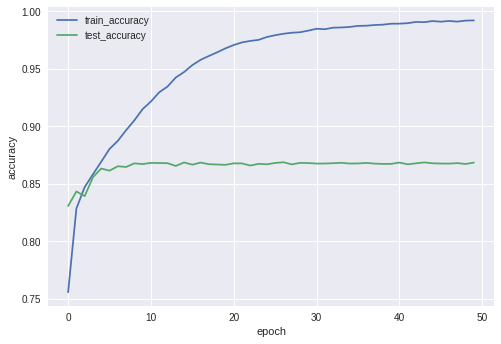

In [16]:
## test score
test_score2 = model2.evaluate(x_test, y_test, verbose = 0)
print("Test loss:", test_score2[0])
print("Test accuracy:", test_score2[1])
show_history(train_model2)

In [0]:
X_train = x_train.reshape(-1,10,10,1)
X_valid = x_valid.reshape(-1,10,10,1)
X_test = x_test.reshape(-1,10,10,1)
del x_train
del x_valid
del x_test

In [0]:
def img_resize(data, d):
  data = np.asarray([cv2.resize(x, (d,d)) for x in data])
  data = data.reshape(-1, d, d, 1)
  return data.repeat(3, axis = -1)

x_train_32 = img_resize(X_train, 32)
x_valid_32 = img_resize(X_valid, 32)
x_test_32 = img_resize(X_test, 32)
#del x_train_32
#del x_valid_32
#del x_test_32

#x_train_75 = img_resize(X_train, 75)
#x_valid_75 = img_resize(X_valid, 75)
#x_test_75 = img_resize(X_test, 75)

In [0]:
## Pre-trained VGG16
conv_base = VGG16(weights = "imagenet", include_top = False, input_shape = (32, 32, 3))
model3 = Sequential()
model3.add(conv_base)
model3.add(Flatten())
model3.add(Dense(512, activation = "relu"))
model3.add(Dropout(0.6))
model3.add(Dense(num_classes, activation = "softmax"))
model3.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 2565      
Total params: 14,979,909
Trainable params: 14,979,909
Non-trainable params: 0
_________________________________________________________________


In [0]:
train_model3 = model3.fit(x_train_32, y_train, batch_size = 256, epochs = 10, validation_data = (x_valid_32, y_valid))

Train on 134875 samples, validate on 89918 samples
Epoch 1/10
134875/134875 [==============================] - 143s 1ms/step - loss: 0.8358 - acc: 0.7043 - val_loss: 0.6035 - val_acc: 0.7865
Epoch 2/10
134875/134875 [==============================] - 140s 1ms/step - loss: 0.5395 - acc: 0.8135 - val_loss: 0.4994 - val_acc: 0.8274
Epoch 3/10
134875/134875 [==============================] - 139s 1ms/step - loss: 0.4718 - acc: 0.8361 - val_loss: 0.4475 - val_acc: 0.8444
Epoch 4/10
134875/134875 [==============================] - 140s 1ms/step - loss: 0.4326 - acc: 0.8477 - val_loss: 0.4779 - val_acc: 0.8400
Epoch 5/10
134875/134875 [==============================] - 140s 1ms/step - loss: 0.4051 - acc: 0.8581 - val_loss: 0.4159 - val_acc: 0.8519
Epoch 6/10
134875/134875 [==============================] - 141s 1ms/step - loss: 0.3816 - acc: 0.8662 - val_loss: 0.4240 - val_acc: 0.8533
Epoch 7/10
134875/134875 [==============================] - 140s 1ms/step - loss: 0.3587 - acc: 0.8736 - val_

In [0]:
test_score3 = model3.evaluate(x_test_32, y_test, verbose = 0)
print("Test loss:", test_score3[0])
print("Test accuracy:", test_score3[1])

Test loss: 0.449897948395907
Test accuracy: 0.8462250217986015


In [0]:
## Pre-trained VGG19
conv_base2 = VGG19(weights = "imagenet", include_top = False, input_shape = (32, 32, 3))
model4 = Sequential()
model4.add(conv_base2)
model4.add(Flatten())
model4.add(Dense(512, activation = "relu"))
model4.add(Dropout(0.6))
model4.add(Dense(num_classes, activation = "softmax"))
model4.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])
model4.summary()

80142336/80134624 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 2565      
Total params: 20,289,605
Trainable params: 20,289,605
Non-trainable params: 0
_________________________________________________________________


In [0]:
train_model4 = model4.fit(x_train_32, y_train, batch_size = 256, epochs = 10, validation_data = (x_valid_32, y_valid))

Train on 134875 samples, validate on 89918 samples
Epoch 1/10
134875/134875 [==============================] - 173s 1ms/step - loss: 0.8597 - acc: 0.6944 - val_loss: 0.6209 - val_acc: 0.7775
Epoch 2/10
134875/134875 [==============================] - 168s 1ms/step - loss: 0.6046 - acc: 0.7847 - val_loss: 0.5826 - val_acc: 0.7934
Epoch 3/10
134875/134875 [==============================] - 168s 1ms/step - loss: 0.5465 - acc: 0.8141 - val_loss: 0.5354 - val_acc: 0.8205
Epoch 4/10
134875/134875 [==============================] - 169s 1ms/step - loss: 0.5035 - acc: 0.8303 - val_loss: 0.4804 - val_acc: 0.8374
Epoch 5/10
134875/134875 [==============================] - 169s 1ms/step - loss: 0.4482 - acc: 0.8453 - val_loss: 0.4431 - val_acc: 0.8457
Epoch 6/10
134875/134875 [==============================] - 168s 1ms/step - loss: 0.4222 - acc: 0.8535 - val_loss: 0.4391 - val_acc: 0.8466
Epoch 7/10
134875/134875 [==============================] - 168s 1ms/step - loss: 0.4014 - acc: 0.8607 - val_

In [0]:
test_score4 = model4.evaluate(x_test_32, y_test, verbose = 0)
print("Test loss:", test_score4[0])
print("Test accuracy:", test_score4[1])

Test loss: 0.44145899839457586
Test accuracy: 0.84955248314133


In [0]:
## Pre-trained ResNet50
conv_base3 = ResNet50(weights = "imagenet", include_top = False, input_shape = (32, 32, 3))
model5 = Sequential()
model5.add(conv_base3)
model5.add(Flatten())
model5.add(Dense(512, activation = "relu"))
model5.add(Dropout(0.6))
model5.add(Dense(num_classes, activation = "softmax"))
model5.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])
model5.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 2565      
Total params: 24,639,365
Trainable params: 24,586,245
Non-trainable params: 53,120
_________________________________________________________________


In [0]:
train_model5 = model5.fit(x_train_32, y_train, batch_size = 256, epochs = 10, validation_data = (x_valid_32, y_valid))

Train on 134875 samples, validate on 89918 samples
Epoch 1/10
134875/134875 [==============================] - 247s 2ms/step - loss: 0.6807 - acc: 0.7713 - val_loss: 0.5381 - val_acc: 0.8104
Epoch 2/10
134875/134875 [==============================] - 220s 2ms/step - loss: 0.4996 - acc: 0.8204 - val_loss: 0.4540 - val_acc: 0.8364
Epoch 3/10
134875/134875 [==============================] - 221s 2ms/step - loss: 0.4357 - acc: 0.8434 - val_loss: 0.4330 - val_acc: 0.8460
Epoch 4/10
134875/134875 [==============================] - 223s 2ms/step - loss: 0.4036 - acc: 0.8554 - val_loss: 0.4222 - val_acc: 0.8500
Epoch 5/10
134875/134875 [==============================] - 220s 2ms/step - loss: 0.3749 - acc: 0.8658 - val_loss: 0.4260 - val_acc: 0.8505
Epoch 6/10
134875/134875 [==============================] - 221s 2ms/step - loss: 0.3516 - acc: 0.8736 - val_loss: 0.4270 - val_acc: 0.8521
Epoch 7/10
134875/134875 [==============================] - 222s 2ms/step - loss: 0.3294 - acc: 0.8812 - val_

In [0]:
test_score5 = model5.evaluate(x_test_32, y_test, verbose = 0)
print("Test loss:", test_score5[0])
print("Test accuracy:", test_score5[1])

Test loss: 0.4860495897098297
Test accuracy: 0.8478264737817328


In [0]:
## Due to memory limitation of Google Colab as well as high dimension of input data required by InceptionV3, we will use reduced dataset on InceptionV3
## train test split small dataset
def img_resize(data, d):
  data = np.asarray([cv2.resize(x, (d,d)) for x in data])
  data = data.reshape(-1, d, d, 1)
  return data.repeat(3, axis = -1)
large, small = train_test_split(yelp, test_size = 0.177941, random_state = 6349)
train, test = train_test_split(small, test_size = 0.4, random_state = 5605)
valid, test = train_test_split(test, test_size = 0.5, random_state = 2410)
X_train = xsplit(train)
Y_train = ysplit(train)
X_test = xsplit(test)
Y_test = ysplit(test)
X_valid = xsplit(valid)
Y_valid = ysplit(valid)
X_train = X_train.reshape(-1,10,10,1)
X_valid = X_valid.reshape(-1,10,10,1)
X_test = X_test.reshape(-1,10,10,1)
x_train_75 = img_resize(X_train, 75)
x_valid_75 = img_resize(X_valid, 75)
x_test_75 = img_resize(X_test, 75)

In [0]:
## Pre-trained InceptionV3
conv_base4 = InceptionV3(weights = "imagenet", include_top = False, input_shape = (75, 75, 3))
model6 = Sequential()
model6.add(conv_base4)
model6.add(Flatten())
model6.add(Dense(512, activation = "relu"))
model6.add(Dropout(0.6))
model6.add(Dense(num_classes, activation = "softmax"))
model6.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])
model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 1, 1, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2565      
Total params: 22,854,437
Trainable params: 22,820,005
Non-trainable params: 34,432
_________________________________________________________________


In [0]:
train_model6 = model6.fit(x_train_75, Y_train, batch_size = 256, epochs = 10, validation_data = (x_valid_75, Y_valid))

Train on 30000 samples, validate on 10000 samples
Epoch 1/10
30000/30000 [==============================] - 74s 2ms/step - loss: 0.2762 - acc: 0.9045 - val_loss: 0.6184 - val_acc: 0.8118
Epoch 2/10
30000/30000 [==============================] - 74s 2ms/step - loss: 0.2311 - acc: 0.9193 - val_loss: 0.6663 - val_acc: 0.7927
Epoch 3/10
30000/30000 [==============================] - 75s 2ms/step - loss: 0.1925 - acc: 0.9336 - val_loss: 0.7027 - val_acc: 0.8092
Epoch 4/10
30000/30000 [==============================] - 75s 2ms/step - loss: 0.1560 - acc: 0.9473 - val_loss: 0.8069 - val_acc: 0.8179
Epoch 5/10
30000/30000 [==============================] - 75s 2ms/step - loss: 0.1449 - acc: 0.9516 - val_loss: 0.7887 - val_acc: 0.8152
Epoch 6/10
30000/30000 [==============================] - 75s 2ms/step - loss: 0.1229 - acc: 0.9584 - val_loss: 0.7750 - val_acc: 0.8168
Epoch 7/10
30000/30000 [==============================] - 76s 3ms/step - loss: 0.1094 - acc: 0.9632 - val_loss: 0.8954 - val_acc

In [0]:
test_score6 = model6.evaluate(x_test_75, Y_test, verbose = 0)
print("Test loss:", test_score6[0])
print("Test accuracy:", test_score6[1])

Test loss: 0.8804917963683605
Test accuracy: 0.8161


In [0]:
X_train = xsplit(train)
Y_train = ysplit(train)
X_test = xsplit(test)
Y_test = ysplit(test)
X_valid = xsplit(valid)
Y_valid = ysplit(valid)
model7 = Sequential()
model7.add(Dense(512, activation = "relu", input_shape = (100,)))
model7.add(Dropout(0.7))
model7.add(Dense(num_classes, activation = "softmax"))
model7.compile(loss = "categorical_crossentropy", optimizer = "adadelta", metrics = ["accuracy"])
model7.summary()
train_model7 = model7.fit(X_train, Y_train, epochs = 10, batch_size = 64, verbose = 1, validation_data = (X_valid, Y_valid))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               51712     
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 2565      
Total params: 54,277
Trainable params: 54,277
Non-trainable params: 0
_________________________________________________________________
Train on 30000 samples, validate on 10000 samples
Epoch 1/10
30000/30000 [==============================] - 9s 314us/step - loss: 0.6446 - acc: 0.7799 - val_loss: 0.4832 - val_acc: 0.8354
Epoch 2/10
30000/30000 [==============================] - 4s 147us/step - loss: 0.5081 - acc: 0.8223 - val_loss: 0.4666 - val_acc: 0.8402
Epoch 3/10
30000/30000 [==============================] - 5s 151us/step - lo

In [0]:
test_score7 = model7.evaluate(X_test, Y_test, verbose = 0)
print("Test loss:", test_score7[0])
print("Test accuracy:", test_score7[1])

Test loss: 0.4273010034799576
Test accuracy: 0.8524
